# 피부과와 성형외과는 서울 특히 강남쪽에 밀집해 있을까?

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [99]:
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus = False)

In [3]:
from IPython.display import set_matplotlib_formats

In [4]:
set_matplotlib_formats('retina')

In [74]:
df = pd.read_csv("data/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv", low_memory=False)

In [75]:
df.shape

(91335, 39)

## 전처리

### 결측치처리

In [76]:
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47291
호정보          75784
경도               0
위도               0
dtype: int64

In [77]:
null_count = df.isnull().sum()

In [78]:
df_null_count = null_count.reset_index()

In [79]:
df_null_count.columns = ['컬럼명', '결측치수']
df_null_count

,컬럼명,결측치수
0,상가업소번호,0
1,상호명,0
2,지점명,89989
3,상권업종대분류코드,0
4,상권업종대분류명,0
5,상권업종중분류코드,0
6,상권업종중분류명,0
7,상권업종소분류코드,0
8,상권업종소분류명,0
9,표준산업분류코드,4922


In [80]:
df_null_count.sort_values(by='결측치수', ascending=False)

,컬럼명,결측치수
2,지점명,89989
34,동정보,83929
28,건물부번지,80731
36,호정보,75784
35,층정보,47291
30,건물명,44882
23,지번부번지,19256
9,표준산업분류코드,4922
10,표준산업분류명,4922
11,시도코드,379


In [81]:
df_null_count_head = df_null_count.sort_values(by='결측치수', ascending=False).head(10)

In [82]:
drop_columns = df_null_count_head['컬럼명'].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [83]:
print(df.shape)
df = df.drop(drop_columns, axis=1)
print(df.shape)

(91335, 39)
(91335, 29)


### 데이터 정제

In [84]:
df.head(3)

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
0,19956873,하나산부인과,S,의료,S01,병원,S01B10,산부인과,경기도,41273.0,...,경기도 안산시 단원구 선부동 1081,412733191011,경기도 안산시 단원구 달미로,10,4127310900110810000010857,경기도 안산시 단원구 달미로 10,425764.0,15236.0,126.814295,37.336344
1,20024149,타워광명내과의원,S,의료,S01,병원,S01B07,내과/외과,서울특별시,11680.0,...,서울특별시 강남구 도곡동 467-14,116804166604,서울특별시 강남구 언주로30길,39,1168011800104670014000001,서울특별시 강남구 언주로30길 39,135270.0,6292.0,127.053198,37.488742
2,20152277,조정현신경외과의원,S,의료,S01,병원,S01B15,신경외과,경기도,41390.0,...,경기도 시흥시 정왕동 1740-1,413903199049,경기도 시흥시 중심상가로,178,4139013200117400001017064,경기도 시흥시 중심상가로 178,429450.0,15066.0,126.734841,37.344955


In [85]:
df.columns

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명',
       '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소', '도로명코드',
       '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도', '위도'],
      dtype='object')

In [86]:
df['시도명']

0          경기도
1        서울특별시
2          경기도
3        부산광역시
4          경기도
         ...  
91330    대전광역시
91331      경기도
91332    부산광역시
91333    서울특별시
91334     충청남도
Name: 시도명, Length: 91335, dtype: object

In [87]:
df['상권업종중분류명'].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [88]:
df['상권업종소분류명'].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [89]:
df_plastic = df[(df['상권업종중분류명'] == '병원') & (df['상권업종소분류명'] == '정형/성형외과') ]

In [90]:
df_skin = df[(df['상권업종중분류명'] == '병원') & (df['상권업종소분류명'] == '피부과') ]

In [91]:
df_plastic.head()

,상가업소번호,상호명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,시도명,시군구코드,...,지번주소,도로명코드,도로명,건물본번지,건물관리번호,도로명주소,구우편번호,신우편번호,경도,위도
8,20808534,코원성형외과,S,의료,S01,병원,S01B08,정형/성형외과,서울특별시,11680.0,...,서울특별시 강남구 신사동 592-4,116803121022,서울특별시 강남구 논현로,826,1168010700105920004010990,서울특별시 강남구 논현로 826,135893.0,6025.0,127.028531,37.522223
18,21165115,에덴성형외과,S,의료,S01,병원,S01B08,정형/성형외과,광주광역시,29140.0,...,광주광역시 서구 치평동 1326,291402009004,광주광역시 서구 상무대로,773,2914012000113260000026255,광주광역시 서구 상무대로 773,502727.0,61961.0,126.847333,35.146675
31,20872995,고운나라성형외과,S,의료,S01,병원,S01B08,정형/성형외과,서울특별시,11740.0,...,서울특별시 강동구 성내동 9-5,117402000008,서울특별시 강동구 천호대로,1032,1174010800100090005004868,서울특별시 강동구 천호대로 1032,134030.0,5379.0,127.126507,37.537333
44,20912401,아미가성형외과,S,의료,S01,병원,S01B08,정형/성형외과,서울특별시,11650.0,...,서울특별시 서초구 방배동 902-1,116504163257,서울특별시 서초구 방배로20길,4,1165010100109020001015305,서울특별시 서초구 방배로20길 4,137060.0,6664.0,126.995334,37.485498
47,21111910,백창희정형외과,S,의료,S01,병원,S01B08,정형/성형외과,전라남도,46130.0,...,전라남도 여수시 여서동 236,461303282051,전라남도 여수시 여서1로,50,4613011900102360000023439,전라남도 여수시 여서1로 50,550260.0,59709.0,127.703386,34.752001


In [92]:
df_seoul_plastic = df_plastic[df_plastic['시도명'] == '서울특별시']

In [93]:
df_seoul_skin = df_skin[df_skin['시도명'] == '서울특별시']

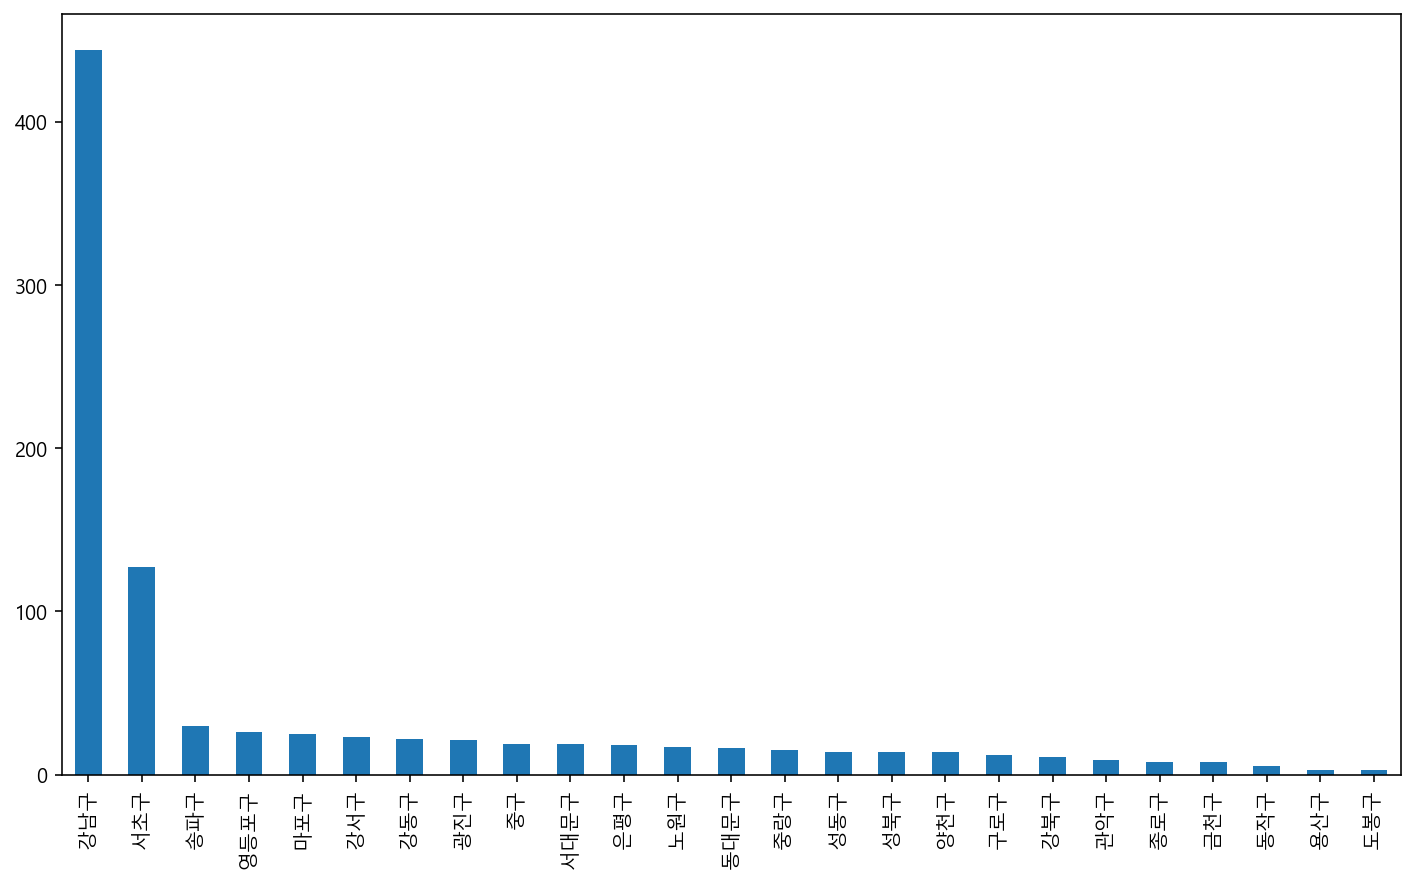

In [100]:
df_seoul_plastic['시군구명'].value_counts().plot.bar(figsize=(12, 7))

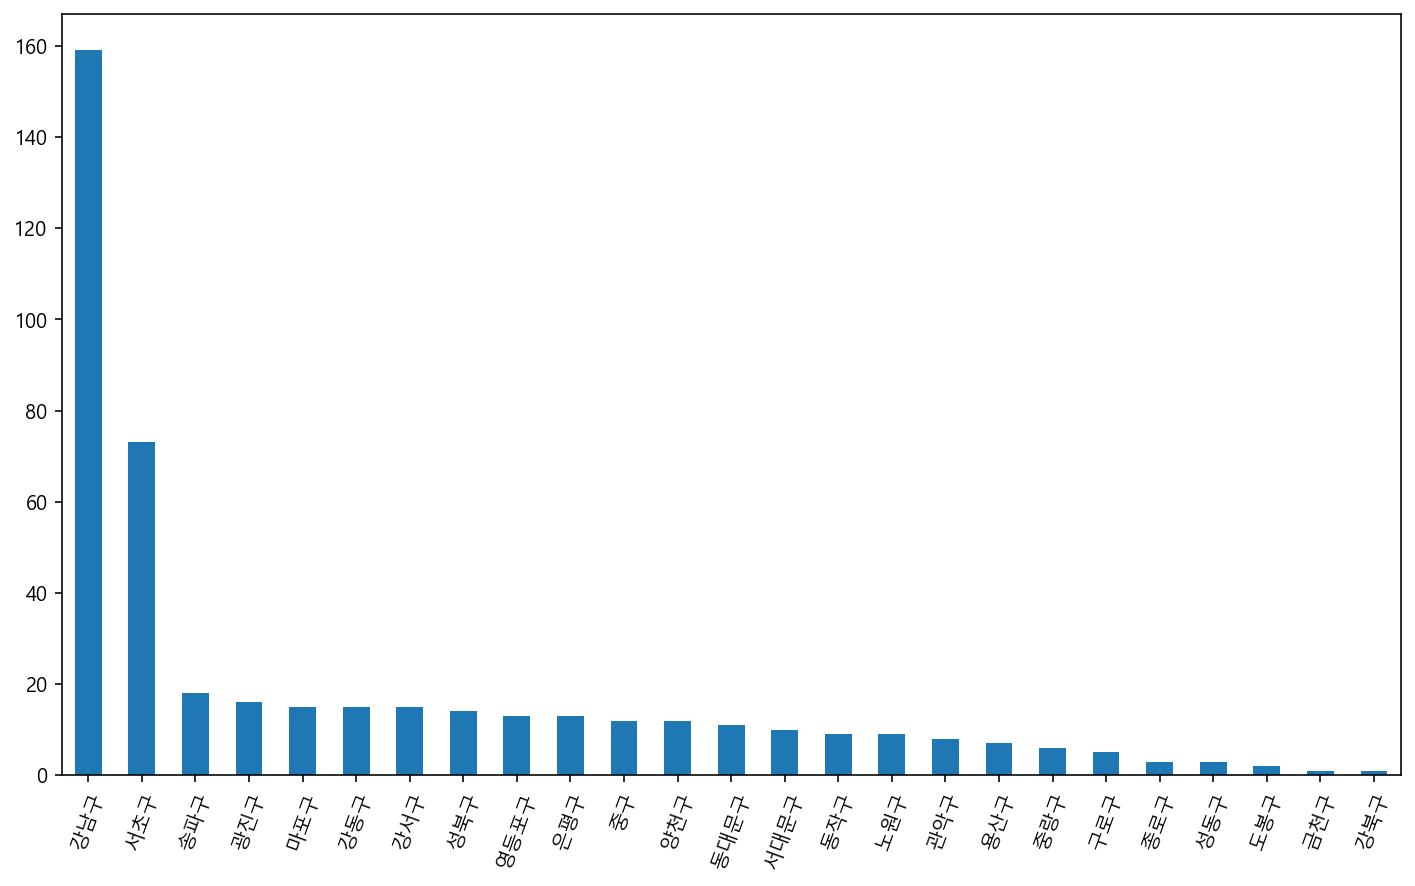

In [101]:
df_seoul_skin['시군구명'].value_counts().plot.bar(figsize=(12,7), rot=70)
# 성형외과와 피부과 모두 강남구와 서초구, 특히 강남구에 밀집해 있음을 알 수 있다

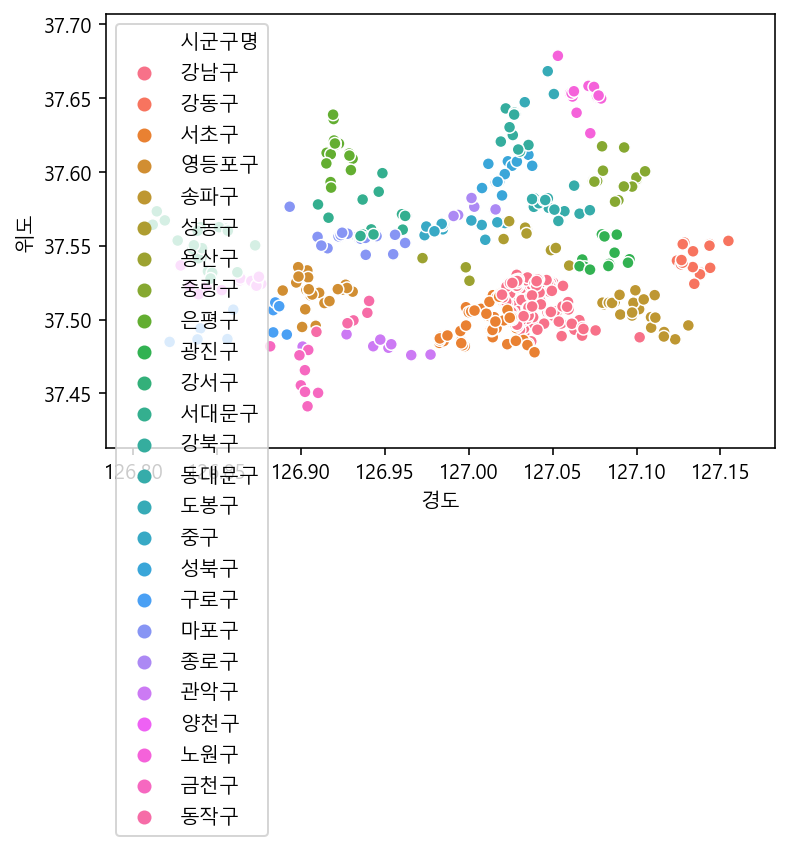

In [102]:
sns.scatterplot(data=df_seoul_plastic, x='경도', y='위도', hue='시군구명')

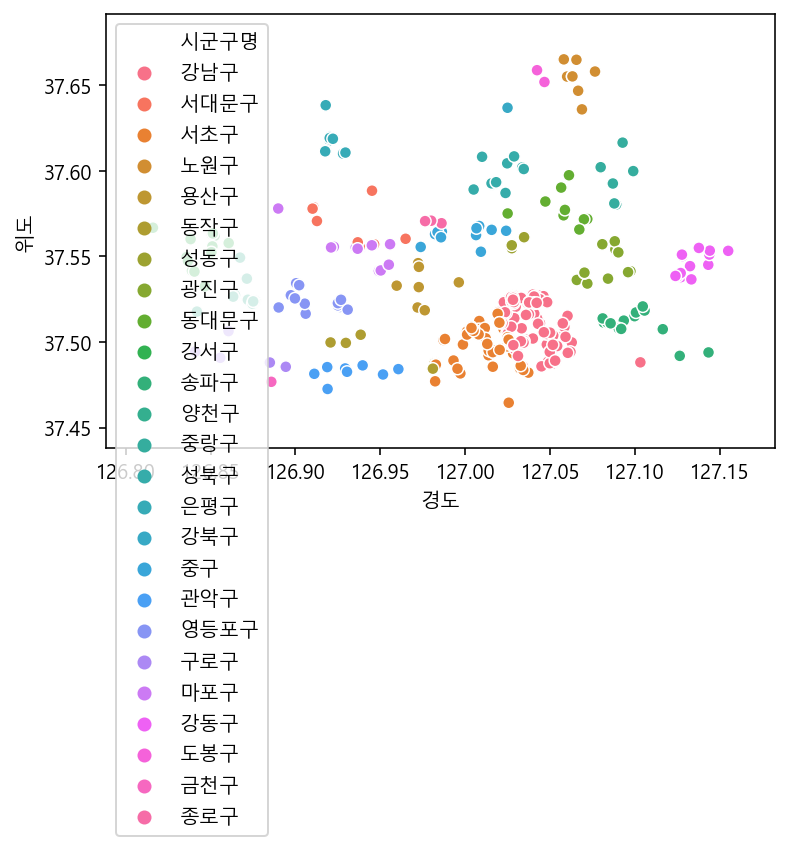

In [103]:
sns.scatterplot(data=df_seoul_skin, x='경도', y='위도', hue='시군구명')

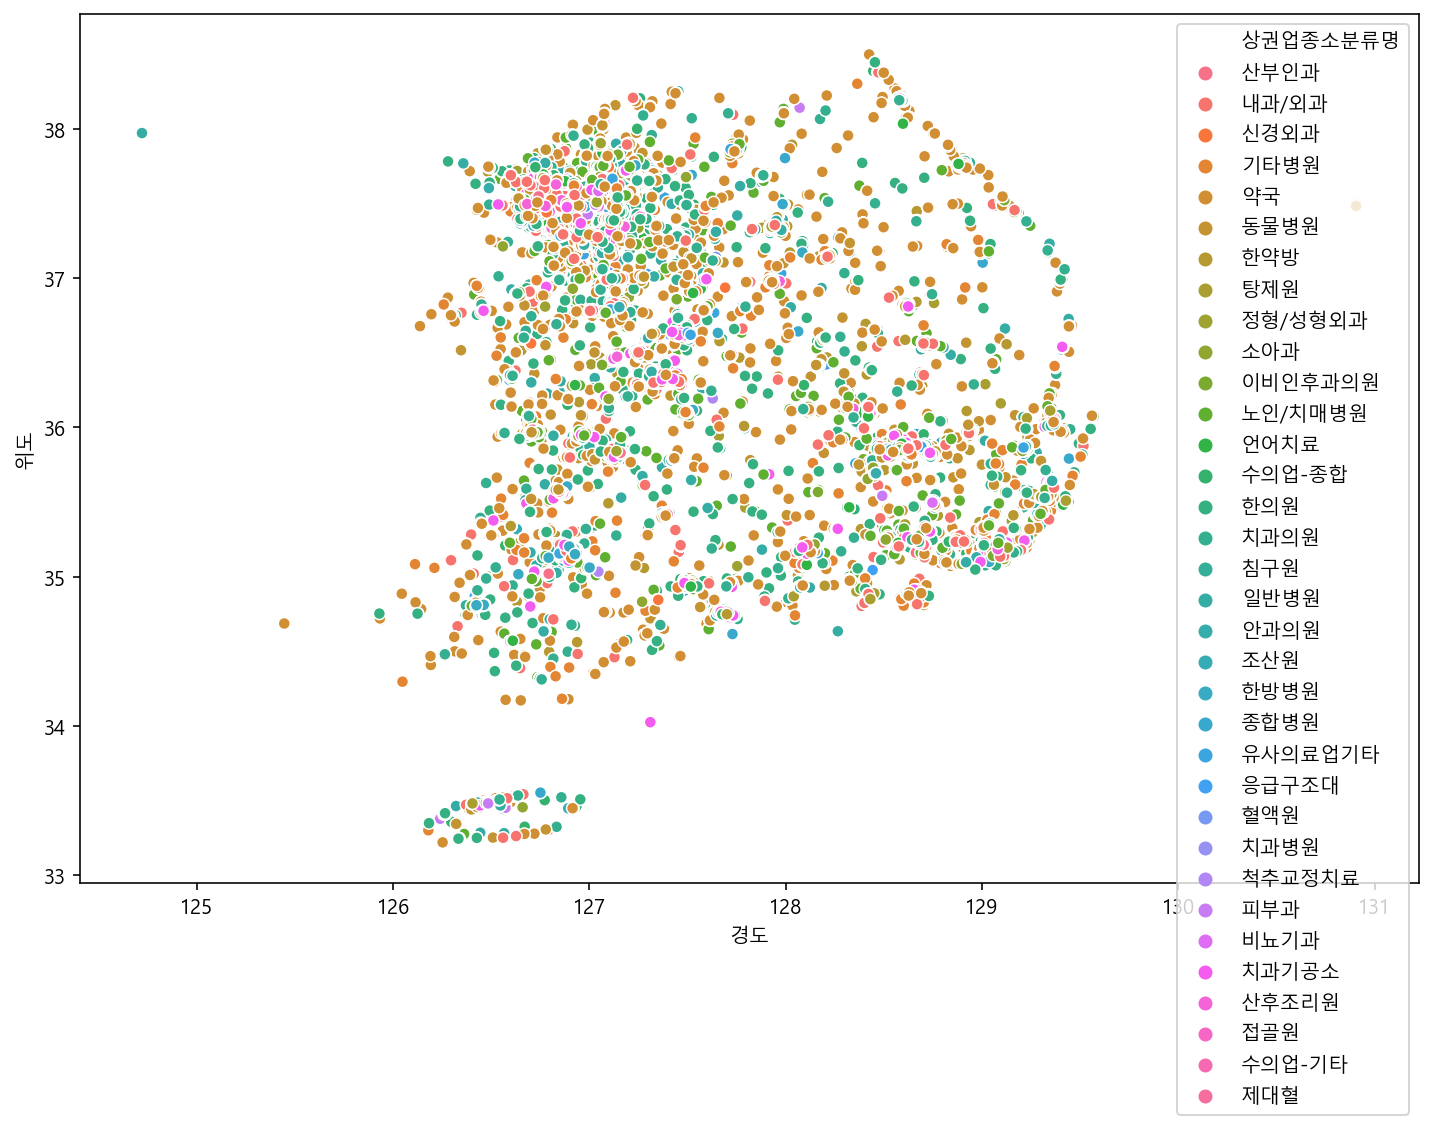

In [108]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='경도', y='위도', hue='상권업종소분류명')